<a href="https://colab.research.google.com/github/abuqaiselegant/internitytask001/blob/main/Visualization_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import urllib.request
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
def html_to_df(url, clean_empty = False , attrs = {}):
    '''
    Input:
        url : url from which the tabel need to be scrapping.
        clean_empty : if remove completly empty column.
        attrs : html attr. dict tag while more then on table e.g. {'class' : 'class_name'}.
    Output:
        df : dataframe
    '''
    html_data = requests.get(url).text
    soup = bs(html_data, "lxml")
    table = str(soup.find("table", attrs=attrs))
    df = pd.read_html(str(table))[0]
    
    if clean_empty :
        df = df.loc[:, ~df.isnull().all(axis = 0)]  
    return df

In [78]:
url = "https://github.com/robert456456456456/Web_server_log_parser/blob/master/devops.log"

In [79]:
df = html_to_df(url,clean_empty=True)
df

,1
0,64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] ...
1,64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] ...
2,64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] ...
3,64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] ...
4,64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] ...
...,...
1541,"10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] ""G..."
1542,"10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] ""G..."
1543,216.139.185.45 - - [12/Mar/2004:13:04:01 -0800...
1544,pd95f99f2.dip.t-dialin.net - - [12/Mar/2004:13...


In [80]:
df = pd.DataFrame(list(df[1].apply(lambda x: x.split())))
df[3] = df[3].apply(lambda x: x.replace('[','') )
df[4] = df[4].apply(lambda x: x.replace(']','') )
df[5] = df.apply(lambda x : ' '.join([x[5],x[6]]).replace('"',''), axis = 1)
df.drop([1,2,7,6],inplace=True,axis = 1)

In [81]:
df

,0,3,4,5,8,9
0,64.242.88.10,07/Mar/2004:16:05:49,-0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846
1,64.242.88.10,07/Mar/2004:16:06:51,-0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523
2,64.242.88.10,07/Mar/2004:16:10:02,-0800,GET /mailman/listinfo/hsdivision,200,6291
3,64.242.88.10,07/Mar/2004:16:11:58,-0800,GET /twiki/bin/view/TWiki/WikiSyntax,200,7352
4,64.242.88.10,07/Mar/2004:16:20:55,-0800,GET /twiki/bin/view/Main/DCCAndPostFix,200,5253
...,...,...,...,...,...,...
1541,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-spam-ratio.1year.png,200,1906
1542,10.0.0.153,12/Mar/2004:12:23:41,-0800,GET /dccstats/stats-hashes.1year.png,200,1582
1543,216.139.185.45,12/Mar/2004:13:04:01,-0800,GET /mailman/listinfo/webber,200,6051
1544,pd95f99f2.dip.t-dialin.net,12/Mar/2004:13:18:57,-0800,GET /razor.html,200,2869


In [82]:
columns = ['IP Address','Date/Time','GMT Offset', 'Action','Return Code','Size']
df.columns  = columns
df['Date/Time']=pd.to_datetime(df['Date/Time'], format='%d/%b/%Y:%H:%M:%S')

In [83]:
df

,IP Address,Date/Time,GMT Offset,Action,Return Code,Size
0,64.242.88.10,2004-03-07 16:05:49,-0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846
1,64.242.88.10,2004-03-07 16:06:51,-0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523
2,64.242.88.10,2004-03-07 16:10:02,-0800,GET /mailman/listinfo/hsdivision,200,6291
3,64.242.88.10,2004-03-07 16:11:58,-0800,GET /twiki/bin/view/TWiki/WikiSyntax,200,7352
4,64.242.88.10,2004-03-07 16:20:55,-0800,GET /twiki/bin/view/Main/DCCAndPostFix,200,5253
...,...,...,...,...,...,...
1541,10.0.0.153,2004-03-12 12:23:41,-0800,GET /dccstats/stats-spam-ratio.1year.png,200,1906
1542,10.0.0.153,2004-03-12 12:23:41,-0800,GET /dccstats/stats-hashes.1year.png,200,1582
1543,216.139.185.45,2004-03-12 13:04:01,-0800,GET /mailman/listinfo/webber,200,6051
1544,pd95f99f2.dip.t-dialin.net,2004-03-12 13:18:57,-0800,GET /razor.html,200,2869


In [84]:
df['IP Address'].value_counts().head(5)

64.242.88.10                       452
10.0.0.153                         270
h24-71-236-129.ca.shawcable.net     51
cr020r01-3.sac.overture.com         44
h24-70-69-74.ca.shawcable.net       32
Name: IP Address, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



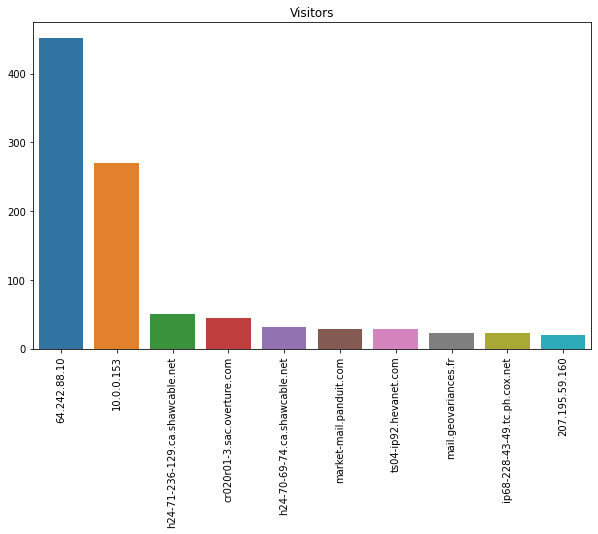

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(df['IP Address'].value_counts().index[0:10],
            df['IP Address'].value_counts().values[0:10],)
plt.xticks(rotation=90)
plt.title('Visitors')
plt.show()